<a href="https://colab.research.google.com/github/yuhui-0611/SEED/blob/main/SEED_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B3%91%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np

* i: 수출국(Non-EU)
  * 국가 목록: ['BRA',
 'CHE',
 'CHN',
 'EGY',
 'GBR',
 'IND',
 'JPN',
 'KOR',
 'RUS',
 'SRB',
 'TUR',
 'TWN',
 'UKR',
 'VNM',
 'ZAF']

* j: 수입국(EU)
  * 국가 목록: ['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN',
                'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT',
                'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']

* t(시간):**문제가 되는 변수는 RCA(2005-2021) & FIT (2000-2019)**

  ** 하지만 CBAM 변수가 2021년을 기준으로 활용되기 때문에 2021년은 꼭 들어갈 필요가 있음**
  * 1안) ```gravity_data_1```선행 논문 처럼 2001-2021년으로 유지. RCA는 2001-2004 값을 존재하는 가장 가까운 연도(2005년)의 값으로 대체(Naive method) / FIT는 2020-2021 값을 존재하는 가장 가까운 연도(2019년)의 값으로 대체(Naive method)
  * 2안) ```gravity_data_2```2005-2021 로 줄여 분석. FIT는 2020-2021 값을 존재하는 가장 가까운 연도(2019년)의 값으로 대체(Naive method)

* **최종 데이터셋**
  * ```equation_7_1```: CBAM 시행 이전 식(년도:2001~2021)
  * ```equation_7_2```: CBAM 시행 이전 식(년도:2005~2021)
  * ```equation_8_1```: CBAM 시행 이후 식(년도:2001~2021)
  * ```equation_8_1```: CBAM 시행 이후 식(년도:2005~2021)

# 식 7 산출
* CBAM 도입 이전의 2001~2021년의 수출량을 종속변수로 설정한 식
* 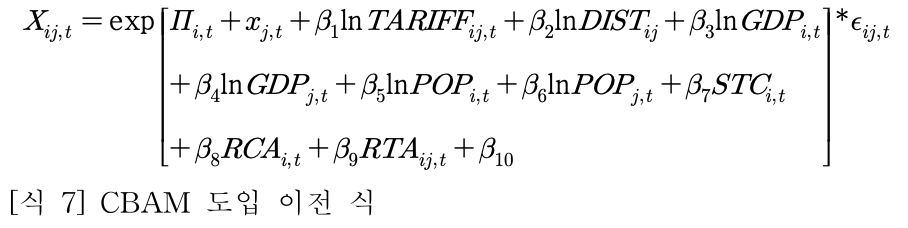




## 종속 변수 및 구조 중력 모형 변수
* DIST
* GDP
* POP
* RTA
* X(Export): 종속 변수
* TARIFF

### DIST/GDP/POP/RTA

In [ ]:
dgpr = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/gravity_dist,gdp,pop,rta.csv')

In [ ]:
dgpr.head(3)

,year,iso3_o,iso3_d,dist,distw_harmonic,gdp_o,gdp_d,pop_o,pop_d,fta_wto,rta_dummy
0,2001,AUT,CHE,597.0,665.0,1.969536e+08,2.786288e+08,8042.293,7229.854,1.0,1
1,2002,AUT,CHE,597.0,665.0,2.129707e+08,3.011278e+08,8081.957,7284.753,1.0,1
2,2003,AUT,CHE,597.0,665.0,2.607215e+08,3.519826e+08,8121.423,7339.001,1.0,1


In [ ]:
# 수출국 및 수입국 목록 확인
print(f'수출국 개수: {len(dgpr.iso3_o.unique())}')
print(f'수출국 목록: {dgpr.iso3_o.unique()}')
print(f'수입국 개수: {len(dgpr.iso3_d.unique())}')
print(f'수입국 목록: {dgpr.iso3_d.unique()}')
# 년도 확인
print(f'년도 개수: {len(dgpr.year.unique())}')
print(f'시작 년도: {min(dgpr.year.unique())}')
print(f'끝 년도: {max(dgpr.year.unique())}')

수출국 개수: 42
수출국 목록: ['AUT' 'BEL' 'BRA' 'CHE' 'CHN' 'CYP' 'CZE' 'DEU' 'DNK' 'ESP' 'FIN' 'FRA'
 'GBR' 'GRC' 'HUN' 'IND' 'IRL' 'KOR' 'LUX' 'LVA' 'MLT' 'HRV' 'NLD' 'PRT'
 'ROU' 'RUS' 'SRB' 'SVN' 'SWE' 'TUR' 'VNM' 'ZAF' 'BGR' 'EGY' 'EST' 'ITA'
 'JPN' 'LTU' 'POL' 'SVK' 'TWN' 'UKR']
수입국 개수: 42
수입국 목록: ['CHE' 'CHN' 'CYP' 'CZE' 'DEU' 'DNK' 'EGY' 'ESP' 'EST' 'FIN' 'FRA' 'GBR'
 'GRC' 'HRV' 'HUN' 'IND' 'IRL' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MLT'
 'POL' 'PRT' 'ROU' 'RUS' 'SRB' 'SVK' 'SVN' 'SWE' 'TUR' 'TWN' 'UKR' 'VNM'
 'ZAF' 'BEL' 'BGR' 'BRA' 'AUT' 'NLD']
년도 개수: 21
시작 년도: 2001
끝 년도: 2021


수출국 및 수입국 추출
* 논문 범위 및 제공된 국가 목록을 바탕으로 EU 및 Non-EU 국가 정의
* EU 27개국 목록 (수입국 필터링 대상)
* GBR은 2020년 탈퇴했으나, 여기서는 논문의 'EU 27개국' 기준을 따름.
* 참고: 논문에서 GBR은 2020년 이후 자체 관세 정책을 따른다고 언급됨.
* 하지만 필터링을 명확히 하기 위해, 전체 목록에서 EU 27에 포함되지 않은 국가를 Non-EU로 가정.

In [ ]:
# 수출국 및 수입국 추출
EU_COUNTRIES = ['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN',
                'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT',
                'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']

ALL_COUNTRIES = ['AUT', 'BEL', 'BRA', 'CHE', 'CHN', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'FIN', 'FRA',
                 'GBR', 'GRC', 'HUN', 'IND', 'IRL', 'KOR', 'LUX', 'LVA', 'MLT', 'HRV', 'NLD', 'PRT',
                 'ROU', 'RUS', 'SRB', 'SVN', 'SWE', 'TUR', 'VNM', 'ZAF', 'BGR', 'EGY', 'EST', 'ITA',
                 'JPN', 'LTU', 'POL', 'SVK', 'TWN', 'UKR']

# 전체 국가 목록에서 EU 국가를 제외한 국가를 Non-EU로 간주.
NON_EU_COUNTRIES = sorted(list(set(ALL_COUNTRIES) - set(EU_COUNTRIES)))

dgpr_filtered = dgpr[(dgpr['iso3_o'].isin(NON_EU_COUNTRIES)) &(dgpr['iso3_d'].isin(EU_COUNTRIES))]

In [ ]:
# 추출된 데이터에 대해 다시 확인
# 수출국 및 수입국 목록 확인
print(f'수출국 개수: {len(dgpr_filtered.iso3_o.unique())}')
print(f'수출국 목록: {dgpr_filtered.iso3_o.unique()}')
print(f'수입국 개수: {len(dgpr_filtered.iso3_d.unique())}')
print(f'수입국 목록: {dgpr_filtered.iso3_d.unique()}')
# 년도 확인
print(f'년도: {len(dgpr_filtered.year.unique())}')
print(f'시작 년도: {min(dgpr_filtered.year.unique())}')
print(f'끝 년도: {max(dgpr_filtered.year.unique())}')

수출국 개수: 15
수출국 목록: ['BRA' 'CHE' 'CHN' 'GBR' 'IND' 'KOR' 'RUS' 'SRB' 'TUR' 'VNM' 'ZAF' 'EGY'
 'JPN' 'TWN' 'UKR']
수입국 개수: 27
수입국 목록: ['BEL' 'BGR' 'CYP' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GRC' 'HRV'
 'HUN' 'IRL' 'ITA' 'LTU' 'LUX' 'LVA' 'MLT' 'ROU' 'SVK' 'SVN' 'SWE' 'AUT'
 'POL' 'PRT' 'NLD']
년도: 21
시작 년도: 2001
끝 년도: 2021


In [ ]:
dgpr_filtered.head(3)

,year,iso3_o,iso3_d,dist,distw_harmonic,gdp_o,gdp_d,pop_o,pop_d,fta_wto,rta_dummy
1512,2001,BRA,BEL,9636.0,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0.0,0
1513,2002,BRA,BEL,9636.0,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0.0,0
1514,2003,BRA,BEL,9636.0,9030.0,5.524693e+08,3.185734e+08,181752.945,10376.133,0.0,0


In [ ]:
# index 재정의
dgpr_filtered.reset_index(inplace=True,drop=True)

# 데이터 칼럼명 논문 칼럼명과 통일
dgpr_filtered.rename(columns={
    'gdp_o': 'GDP_i',
    'gdp_d': 'GDP_j',
    'pop_o': 'POP_i',
    'pop_d': 'POP_j',
    'rta_dummy': 'RTA_ij',
    'iso3_o': 'i',
    'iso3_d': 'j',
    'distw_harmonic': 'DIST_ij',}, inplace=True)
### 구조중력모형 연구의 최신 동향은 무역 비용을 보다 정확하게 측정하기 위해 harmonic distance를 사용하는 경향이 있다고함.
### 왜냐하면 무역 흐름을 단순한 수도 간의 거리로 측정하는 것보다 인구 중심지로 가중치를 준 거리가 무역 비용을 더 잘 대변한다고 보기 때문. -> DIST 변수는 dist 대신 distw_harmonic 활용

# 필요 없는 칼럼 drop
dgpr_filtered.drop(columns=['dist'], inplace=True)
dgpr_filtered.drop(columns=['fta_wto'], inplace=True)

/tmp/ipython-input-688962165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgpr_filtered.rename(columns={
/tmp/ipython-input-688962165.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgpr_filtered.drop(columns=['dist'], inplace=True)
/tmp/ipython-input-688962165.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgpr_filtered.drop(columns=['fta_wto'], inplace=True)


In [ ]:
dgpr_filtered.head(3)

,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij
0,2001,BRA,BEL,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0
1,2002,BRA,BEL,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0
2,2003,BRA,BEL,9030.0,5.524693e+08,3.185734e+08,181752.945,10376.133,0


In [ ]:
dgpr_filtered.shape

(9408, 9)

수출국 15, 수입국 27, 년도 21로 총 행이 8505여야 하는데.. 데이터가 일부 중복되어 있는 것 같다

In [ ]:
# 중복 데이터 제거
dgpr_filtered.drop_duplicates(subset=['year', 'i', 'j'], keep='first', inplace=True)

dgpr_filtered.shape

/tmp/ipython-input-1948918290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dgpr_filtered.drop_duplicates(subset=['year', 'i', 'j'], keep='first', inplace=True)


(8505, 9)

dgpr_filtered(수입국 수출국 및 모든 년도에 대한 데이터가 있음) 기준으로 나머지 데이터 병합

### X(Export): 종속변수

In [ ]:
X = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/gravity_export_processed.csv')

In [ ]:
X.head()

,period,reporterISO,partnerISO,qty
0,2001,AUT,BEL,NaN
1,2001,AUT,BEL,125.0
2,2001,AUT,BEL,2731000.0
3,2001,AUT,BEL,31800.0
4,2001,AUT,BEL,324199.0


In [ ]:
# 수출국 및 수입국 목록 확인
print(f'수출국 개수: {len(X.reporterISO.unique())}')
print(f'수출국 목록: {X.reporterISO.unique()}')
print(f'수입국 개수: {len(X.partnerISO.unique())}')
print(f'수입국 목록: {X.partnerISO.unique()}')
# 년도 확인
print(f'년도: {len(X.period.unique())}')
print(f'시작 년도: {min(X.period.unique())}')
print(f'끝 년도: {max(X.period.unique())}')

수출국 개수: 41
수출국 목록: ['AUT' 'BEL' 'BGR' 'BRA' 'CHE' 'CHN' 'CYP' 'CZE' 'DEU' 'DNK' 'EGY' 'ESP'
 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IND' 'IRL' 'ITA' 'JPN' 'KOR'
 'LTU' 'LUX' 'LVA' 'MLT' 'NLD' 'POL' 'PRT' 'ROU' 'RUS' 'SVK' 'SVN' 'SWE'
 'TUR' 'UKR' 'VNM' 'ZAF' 'SRB']
수입국 개수: 41
수입국 목록: ['BEL' 'BGR' 'BRA' 'CHE' 'CHN' 'CYP' 'CZE' 'DEU' 'DNK' 'EGY' 'ESP' 'EST'
 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IND' 'IRL' 'ITA' 'JPN' 'KOR' 'LTU'
 'LUX' 'LVA' 'MLT' 'NLD' 'POL' 'PRT' 'ROU' 'RUS' 'SVK' 'SVN' 'SWE' 'TUR'
 'UKR' 'VNM' 'ZAF' 'AUT' 'SRB']
년도: 21
시작 년도: 2001
끝 년도: 2021


특징: 대만 데이터 없음

In [ ]:
# 수출국 및 수입국 추출
X_filtered = X[(X['reporterISO'].isin(NON_EU_COUNTRIES)) &(X['partnerISO'].isin(EU_COUNTRIES))]

In [ ]:
# 추출된 데이터에 대해 다시 확인
# 수출국 및 수입국 목록 확인
print(f'수출국 개수: {len(X_filtered.reporterISO.unique())}')
print(f'수출국 목록: {X_filtered.reporterISO.unique()}')
print(f'수입국 개수: {len(X_filtered.partnerISO.unique())}')
print(f'수입국 목록: {X_filtered.partnerISO.unique()}')
# 년도 확인
print(f'년도: {len(X_filtered.period.unique())}')
print(f'시작 년도: {min(X_filtered.period.unique())}')
print(f'끝 년도: {max(X_filtered.period.unique())}')

수출국 개수: 14
수출국 목록: ['BRA' 'CHE' 'CHN' 'EGY' 'GBR' 'IND' 'JPN' 'KOR' 'RUS' 'TUR' 'UKR' 'VNM'
 'ZAF' 'SRB']
수입국 개수: 27
수입국 목록: ['AUT' 'BEL' 'CYP' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GRC' 'HRV' 'HUN'
 'IRL' 'ITA' 'LTU' 'LUX' 'LVA' 'MLT' 'NLD' 'POL' 'PRT' 'ROU' 'SVK' 'SWE'
 'BGR' 'CZE' 'SVN']
년도: 21
시작 년도: 2001
끝 년도: 2021


In [ ]:
# 데이터 칼럼명 논문 칼럼명과 통일
X_filtered.rename(columns={
    'period': 'year',
    'reporterISO': 'i',
    'partnerISO': 'j',
    'qty': 'X_ij'}, inplace=True)

/tmp/ipython-input-649063467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered.rename(columns={


In [ ]:
X_filtered.head()

,year,i,j,X_ij
1070,2001,BRA,AUT,0.000
1071,2001,BRA,AUT,66.594
1072,2001,BRA,AUT,232996.700
1073,2001,BRA,AUT,53179.538
1074,2001,BRA,BEL,0.000


In [ ]:
X_total = X_filtered.groupby(['year', 'i', 'j'])['X_ij'].sum().reset_index()

In [ ]:
X_total.shape

(7573, 4)

In [ ]:
# 중복 데이터 제거
X_total.drop_duplicates(subset=['year', 'i', 'j'], keep='first', inplace=True)

X_total.shape

(7573, 4)

중복 데이터가 없다

In [ ]:
# 데이터 병합
gravity_data = pd.merge(dgpr_filtered, X_total, on=['year', 'i', 'j'],how='left')

In [ ]:
gravity_data.shape

(8505, 10)

In [ ]:
gravity_data.head(3)

,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij
0,2001,BRA,BEL,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0,278060.241
1,2002,BRA,BEL,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0,2284131.632
2,2003,BRA,BEL,9030.0,5.524693e+08,3.185734e+08,181752.945,10376.133,0,1579454.611


### TARIFF

In [ ]:
tariff = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/gravity_tariff_processed.csv')

In [ ]:
tariff.head()

,year,iso1,iso2,mfn
0,2001,AUT,BEL,2.58565
1,2001,AUT,BGR,2.58565
2,2001,AUT,BRA,2.58565
3,2001,AUT,CHE,2.58565
4,2001,AUT,CHN,2.58565


In [ ]:
# 수출국 및 수입국 목록 확인
print(f'수출국 개수: {len(tariff.iso1.unique())}')
print(f'수출국 목록: {tariff.iso1.unique()}')
print(f'수입국 개수: {len(tariff.iso2.unique())}')
print(f'수입국 목록: {tariff.iso2.unique()}')
# 년도 확인
print(f'년도: {len(tariff.year.unique())}')
print(f'시작 년도: {min(tariff.year.unique())}')
print(f'끝 년도: {max(tariff.year.unique())}')

수출국 개수: 42
수출국 목록: ['AUT' 'BEL' 'BGR' 'BRA' 'CHE' 'CHN' 'CYP' 'CZE' 'DEU' 'DNK' 'EGY' 'ESP'
 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IND' 'IRL' 'ITA' 'JPN' 'KOR'
 'LTU' 'LUX' 'LVA' 'MLT' 'NLD' 'POL' 'PRT' 'ROU' 'RUS' 'SRB' 'SVK' 'SVN'
 'SWE' 'TUR' 'TWN' 'UKR' 'VNM' 'ZAF']
수입국 개수: 42
수입국 목록: ['BEL' 'BGR' 'BRA' 'CHE' 'CHN' 'CYP' 'CZE' 'DEU' 'DNK' 'EGY' 'ESP' 'EST'
 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IND' 'IRL' 'ITA' 'JPN' 'KOR' 'LTU'
 'LUX' 'LVA' 'MLT' 'NLD' 'POL' 'PRT' 'ROU' 'RUS' 'SRB' 'SVK' 'SVN' 'SWE'
 'TUR' 'TWN' 'UKR' 'VNM' 'ZAF' 'AUT']
년도: 21
시작 년도: 2001
끝 년도: 2021


In [ ]:
# 수출국 및 수입국 추출
tariff_filtered = tariff[(tariff['iso1'].isin(NON_EU_COUNTRIES)) &(tariff['iso2'].isin(EU_COUNTRIES))]

In [ ]:
# 추출된 데이터에 대해 다시 확인
# 수출국 및 수입국 목록 확인
print(f'수출국 개수: {len(tariff_filtered.iso1.unique())}')
print(f'수출국 목록: {tariff_filtered.iso1.unique()}')
print(f'수입국 개수: {len(tariff_filtered.iso2.unique())}')
print(f'수입국 목록: {tariff_filtered.iso2.unique()}')
# 년도 확인
print(f'년도: {len(tariff_filtered.year.unique())}')
print(f'시작 년도: {min(tariff_filtered.year.unique())}')
print(f'끝 년도: {max(tariff_filtered.year.unique())}')

수출국 개수: 15
수출국 목록: ['BRA' 'CHE' 'CHN' 'EGY' 'GBR' 'IND' 'JPN' 'KOR' 'RUS' 'SRB' 'TUR' 'TWN'
 'UKR' 'VNM' 'ZAF']
수입국 개수: 27
수입국 목록: ['AUT' 'BEL' 'BGR' 'CYP' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GRC'
 'HRV' 'HUN' 'IRL' 'ITA' 'LTU' 'LUX' 'LVA' 'MLT' 'NLD' 'POL' 'PRT' 'ROU'
 'SVK' 'SVN' 'SWE']
년도: 21
시작 년도: 2001
끝 년도: 2021


In [ ]:
# 데이터 칼럼명 논문 칼럼명과 통일
tariff_filtered.rename(columns={
    'iso1': 'i',
    'iso2': 'j',
    'mfn': 'TARIFF_ij'}, inplace=True)

/tmp/ipython-input-2812321378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariff_filtered.rename(columns={


In [ ]:
tariff_filtered.shape

(8505, 4)

In [ ]:
tariff_filtered.head(2)

,year,i,j,TARIFF_ij
123,2001,BRA,AUT,14.575108
124,2001,BRA,BEL,14.575108


In [ ]:
# 데이터 병합
gravity_data = pd.merge(gravity_data, tariff_filtered, on=['year', 'i', 'j'],how='left')

In [ ]:
gravity_data.head(2)

,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij
0,2001,BRA,BEL,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0,278060.241,14.575108
1,2002,BRA,BEL,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0,2284131.632,13.669381


In [ ]:
gravity_data.shape

(8505, 11)

## 철강 산업 특성 및 환경 관련 변수
* STC
* RCA

### STC

In [ ]:
stc = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/gravity_stc_processed.csv')
stc.head(3)

,TIME_PERIOD,COUNTRY,OBS_VALUE
0,2001,AUT,8.00
1,2001,BEL,13.57
2,2001,BGR,3.15


In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(stc.COUNTRY.unique())}')
print(f'수출국 목록: {stc.COUNTRY.unique()}')

# 년도 확인
print(f'년도: {len(stc.TIME_PERIOD.unique())}')
print(f'시작 년도: {min(stc.TIME_PERIOD.unique())}')
print(f'끝 년도: {max(stc.TIME_PERIOD.unique())}')

수출국 개수: 37
수출국 목록: ['AUT' 'BEL' 'BGR' 'BRA' 'CHE' 'CHN' 'CZE' 'DEU' 'DNK' 'EGY' 'ESP' 'FIN'
 'FRA' 'GRC' 'HRV' 'HUN' 'IND' 'ITA' 'JPN' 'KOR' 'LUX' 'LVA' 'NLD' 'POL'
 'PRT' 'ROU' 'RUS' 'SRB' 'SVK' 'SVN' 'SWE' 'TUR' 'TWN' 'UKR' 'VNM' 'ZAF'
 'GBR']
년도: 21
시작 년도: 2001
끝 년도: 2021


['CYP', 'EST', 'IRL', 'LTU', 'MLT'] 국가 데이터 없음

In [ ]:
# 수출국 추출
stc_filtered = stc[stc['COUNTRY'].isin(NON_EU_COUNTRIES)]

In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(stc_filtered.COUNTRY.unique())}')
print(f'수출국 목록: {stc_filtered.COUNTRY.unique()}')

# 년도 확인
print(f'년도: {len(stc_filtered.TIME_PERIOD.unique())}')
print(f'시작 년도: {min(stc_filtered.TIME_PERIOD.unique())}')
print(f'끝 년도: {max(stc_filtered.TIME_PERIOD.unique())}')

수출국 개수: 15
수출국 목록: ['BRA' 'CHE' 'CHN' 'EGY' 'IND' 'JPN' 'KOR' 'RUS' 'SRB' 'TUR' 'TWN' 'UKR'
 'VNM' 'ZAF' 'GBR']
년도: 21
시작 년도: 2001
끝 년도: 2021


수출국 국가 데이터는 전부 있음(다행히)

In [ ]:
# index 재설정
stc_filtered.reset_index(inplace=True,drop=True)

# 데이터 칼럼명 논문 칼럼명과 통일
stc_filtered.rename(columns={
    'COUNTRY': 'i',
    'TIME_PERIOD': 'year',
    'OBS_VALUE':'STC_i'}, inplace=True)

stc_filtered.head(3)

/tmp/ipython-input-1698159220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stc_filtered.rename(columns={


,year,i,STC_i
0,2001,BRA,34.69
1,2001,CHE,1.37
2,2001,CHN,160.00


In [ ]:
# 데이터 병합
gravity_data = pd.merge(gravity_data,stc_filtered,on=['year', 'i'], how='left')

gravity_data.head()

,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i
0,2001,BRA,BEL,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0,278060.241,14.575108,34.69
1,2002,BRA,BEL,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0,2284131.632,13.669381,35.45
2,2003,BRA,BEL,9030.0,5.524693e+08,3.185734e+08,181752.945,10376.133,0,1579454.611,13.334841,35.45
3,2004,BRA,BEL,9030.0,6.637603e+08,3.704613e+08,184010.284,10421.137,0,799122.101,13.300054,36.00
4,2005,BRA,BEL,9023.0,8.821857e+08,3.869450e+08,186142.410,10478.617,0,647030.764,12.082067,36.00


In [ ]:
gravity_data.shape

(8505, 12)

### RCA

In [ ]:
rca = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/gravity_rca_processed.csv')
rca.head(3)

,Year,Country,HS_code,RCA
0,2005,CHN,72,0.726026
1,2005,DEU,72,0.884205
2,2005,JPN,72,1.501465


In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(rca.Country.unique())}')
print(f'수출국 목록: {rca.Country.unique()}')

# 년도 확인
print(f'년도: {len(rca.Year.unique())}')
print(f'시작 년도: {min(rca.Year.unique())}')
print(f'끝 년도: {max(rca.Year.unique())}')

수출국 개수: 42
수출국 목록: ['CHN' 'DEU' 'JPN' 'KOR' 'BEL' 'ITA' 'FRA' 'RUS' 'BRA' 'NLD' 'IND' 'TUR'
 'VNM' 'AUT' 'TWN' 'ESP' 'GBR' 'SWE' 'ZAF' 'POL' 'FIN' 'CZE' 'SVK' 'UKR'
 'EGY' 'ROU' 'PRT' 'DNK' 'SVN' 'HUN' 'LUX' 'CHE' 'BGR' 'SRB' 'GRC' 'LTU'
 'HRV' 'EST' 'IRL' 'LVA' 'CYP' 'MLT']
년도: 20
시작 년도: 2005
끝 년도: 2024


년도가 2005~2024...

* 지금까지는 01-21까지 보았는데.. 이 변수 하나 때문에 05-21로 봐야 할 지.. Naive Method를 쓸지..
* ```gravity_data_1```(2001-2021) ```gravity_data_2```(2005-2021) 경우로 일단 나누자

In [ ]:
# 수출국 추출
rca_filtered = rca[rca['Country'].isin(NON_EU_COUNTRIES)]

In [ ]:
# 년도 추출
rca_filtered = rca_filtered[rca_filtered['Year']<=2021]

In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(rca_filtered.Country.unique())}')
print(f'수출국 목록: {rca_filtered.Country.unique()}')

# 년도 확인
print(f'년도: {len(rca_filtered.Year.unique())}')
print(f'시작 년도: {min(rca_filtered.Year.unique())}')
print(f'끝 년도: {max(rca_filtered.Year.unique())}')

수출국 개수: 15
수출국 목록: ['CHN' 'JPN' 'KOR' 'RUS' 'BRA' 'IND' 'TUR' 'VNM' 'TWN' 'GBR' 'ZAF' 'UKR'
 'EGY' 'CHE' 'SRB']
년도: 17
시작 년도: 2005
끝 년도: 2021


In [ ]:
rca_filtered.head(2)

,Year,Country,HS_code,RCA
0,2005,CHN,72,0.726026
2,2005,JPN,72,1.501465


In [ ]:
# HS Code -> 72번, 73번 RCA를 평균으로 산출
rca_filtered = rca_filtered.groupby(['Year', 'Country'])['RCA'].mean().reset_index()

In [ ]:
# index 재설정
rca_filtered.reset_index(inplace=True,drop=True)

# 데이터 칼럼명 논문 칼럼명과 통일
rca_filtered.rename(columns={
    'Country': 'i',
    'Year': 'year',
    'RCA':'RCA_i'}, inplace=True)

rca_filtered.head(3)

,year,i,RCA_i
0,2005,BRA,1.640290
1,2005,CHE,0.614627
2,2005,CHN,1.117061


In [ ]:
# 데이터 병합 1안
# 초기 4년(2001~2004)의 RCA 값 대리 변수 생성
# 2005년 RCA 값을 추출하여 대리 변수로 사용
rca_2005 = rca_filtered[rca_filtered['year'] == 2005].copy()
rca_2005.drop(columns=['year'], inplace=True)

# 2001년, 2002년, 2003년, 2004년 데이터 생성 및 2005년 값 부여
years_to_impute = [2001, 2002, 2003, 2004]
imputed_rca_list = []

for y in years_to_impute:
    temp_df = rca_2005.copy()
    temp_df['year'] = y
    imputed_rca_list.append(temp_df)

# 원본 2005년 데이터와 대리 변수 데이터를 결합
imputed_rca_df = pd.concat(imputed_rca_list, ignore_index=True)
final_rca_data = pd.concat([rca_filtered, imputed_rca_df], ignore_index=True)

# gravity_data와 최종 RCA 데이터 병합
gravity_data_1 = pd.merge(gravity_data,final_rca_data, on=['year', 'i'],how='left')

In [ ]:
print(gravity_data_1.shape)
gravity_data_1.head(2)

(8505, 13)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i
0,2001,BRA,BEL,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0,278060.241,14.575108,34.69,1.64029
1,2002,BRA,BEL,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0,2284131.632,13.669381,35.45,1.64029


In [ ]:
# 데이터 병합
gravity_data_2025 = gravity_data[gravity_data['year']>=2005]

gravity_data_2 = pd.merge(gravity_data_2025,rca_filtered,on=['year', 'i'], how='left')

print(gravity_data_2.shape)
gravity_data_2.head(2)

(6885, 13)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i
0,2005,BRA,BEL,9023.0,8.821857e+08,3.869450e+08,186142.410,10478.617,0,647030.764,12.082067,36.0,1.640290
1,2006,BRA,BEL,9023.0,1.088917e+09,4.106781e+08,188134.308,10547.958,0,620769.468,12.032663,36.9,1.469125


## 고정 효과 더미 변수
* $\pi$
* $x$

### $\pi$ - 수출국 시간 고정 효과 더미 변수

In [ ]:
# 수출국 시간 고정 효과 변수 생성 (Exporter-Year Fixed Effect)
gravity_data_1['pi_i'] = (gravity_data_1['i'].astype(str) + '_' + gravity_data_1['year'].astype(str)).astype('category')

### $x$ - 수입국 시간 고정 효과 더미 변수

In [ ]:
# 수입국 시간 고정 효과 변수 생성 (Importer-Year Fixed Effect)
gravity_data_1['x_j'] = (gravity_data_1['j'].astype(str) + '_' + gravity_data_1['year'].astype(str)).astype('category')

In [ ]:
print(gravity_data_1.shape)
gravity_data_1.head(3)

(8505, 15)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i,pi_i,x_j
0,2001,BRA,BEL,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0,278060.241,14.575108,34.69,1.64029,BRA_2001,BEL_2001
1,2002,BRA,BEL,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0,2284131.632,13.669381,35.45,1.64029,BRA_2002,BEL_2002
2,2003,BRA,BEL,9030.0,5.524693e+08,3.185734e+08,181752.945,10376.133,0,1579454.611,13.334841,35.45,1.64029,BRA_2003,BEL_2003


In [ ]:
# 수출국 시간 고정 효과 변수 생성 (Exporter-Year Fixed Effect)
gravity_data_2['pi_i'] = gravity_data_2['i'].astype(str) + '_' + gravity_data_2['year'].astype(str)

# 수입국 시간 고정 효과 변수 생성 (Importer-Year Fixed Effect)
gravity_data_2['x_j'] = gravity_data_2['j'].astype(str) + '_' + gravity_data_2['year'].astype(str)

In [ ]:
print(gravity_data_2.shape)
gravity_data_2.head(3)

(6885, 15)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i,pi_i,x_j
0,2005,BRA,BEL,9023.0,8.821857e+08,3.869450e+08,186142.410,10478.617,0,647030.764,12.082067,36.0,1.640290,BRA_2005,BEL_2005
1,2006,BRA,BEL,9023.0,1.088917e+09,4.106781e+08,188134.308,10547.958,0,620769.468,12.032663,36.9,1.469125,BRA_2006,BEL_2006
2,2007,BRA,BEL,9023.0,1.366824e+09,4.722846e+08,189996.979,10625.700,0,2618435.219,12.024435,39.3,1.235019,BRA_2007,BEL_2007


## 친환경 전환 역량 지표(TARIFF와 교호작용으로 넣기 + 독립변수로도 넣기)
* FIT
* PATENTS
* RENEWABLE
* ln RDSTOCK: 표본이 너무 적어 반영 x

### FIT

In [ ]:
fit = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/FIT22.csv', header=None, skiprows=3)
fit.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,Year,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
1,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def preprocess_fit_data(raw_fit_data):

    fit_data = raw_fit_data.copy()

    fit_data.drop(columns=[1, 21], inplace=True)
    fit_data.drop(fit_data.index[0:3], inplace=True)
    fit_data.rename(columns={0: 'Country'}, inplace=True)

    year_map = {col_idx: year for col_idx, year in zip(fit_data.columns[1:], range(2001, 2020))}
    fit_data.rename(columns=year_map, inplace=True)

    fit_long = fit_data.melt(id_vars=['Country'], var_name='year', value_name='FIT')

    fit_long['FIT'] = fit_long['FIT'].astype(str).str.replace(r'A,\*\s*', '', regex=True)
    fit_long['FIT'] = pd.to_numeric(fit_long['FIT'], errors='coerce')
    fit_long['year'] = fit_long['year'].astype(int)

    # ISO 코드 매핑 및 필터링
    country_to_iso = {
        'Austria': 'AUT', 'Belgium': 'BEL', 'Bulgaria': 'BGR', 'Cyprus': 'CYP',
        'Czechia': 'CZE', 'Germany': 'DEU', 'Denmark': 'DNK', 'Spain': 'ESP',
        'Estonia': 'EST', 'Finland': 'FIN', 'France': 'FRA', 'Greece': 'GRC',
        'Croatia': 'HRV', 'Hungary': 'HUN', 'Ireland': 'IRL', 'Italy': 'ITA',
        'Lithuania': 'LTU', 'Luxembourg': 'LUX', 'Latvia': 'LVA', 'Malta': 'MLT',
        'Netherlands': 'NLD', 'Poland': 'POL', 'Portugal': 'PRT', 'Romania': 'ROU',
        'Slovakia': 'SVK', 'Slovenia': 'SVN', 'Sweden': 'SWE',
        'Brazil': 'BRA', 'Switzerland': 'CHE', 'China': 'CHN', 'Egypt': 'EGY',
        'United Kingdom': 'GBR', 'India': 'IND', 'Japan': 'JPN', 'Korea': 'KOR',
        'Russian Federation': 'RUS', 'Turkey': 'TUR', 'Taiwan': 'TWN',
        'Ukraine': 'UKR', 'Vietnam': 'VNM', 'South Africa': 'ZAF', 'Canada': 'CAN',
    }

    fit_long['i'] = fit_long['Country'].map(country_to_iso)
    fit_filtered = fit_long.dropna(subset=['i'])
    fit_filtered.drop_duplicates(subset=['year', 'i'], keep='first', inplace=True)

    fit_final = fit_filtered
    fit_final.rename(columns={'FIT': 'FIT_i'}, inplace=True)
    fit_final = fit_final[['year', 'i', 'FIT_i']].drop_duplicates()

    return fit_final


fit_final = preprocess_fit_data(fit)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/tmp/ipython-input-72199091.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_filtered.drop_duplicates(subset=['year', 'i'], keep='first', inplace=True)
/tmp/ipython-input-72199091.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_final.rename(columns={'FIT': 'FIT_i'}, inplace=True)


In [ ]:
fit_final.head(3)

,year,i,FIT_i
0,2001,AUT,0.0403
1,2001,BEL,0.0000
2,2001,CZE,0.0000


In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(fit_final.i.unique())}')
print(f'수출국 목록: {fit_final.i.unique()}')

# 년도 확인
print(f'년도: {len(fit_final.year.unique())}')
print(f'시작 년도: {min(fit_final.year.unique())}')
print(f'끝 년도: {max(fit_final.year.unique())}')

수출국 개수: 29
수출국 목록: ['AUT' 'BEL' 'CZE' 'DNK' 'EST' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'IRL' 'ITA'
 'JPN' 'KOR' 'LVA' 'LTU' 'LUX' 'SVN' 'ESP' 'SWE' 'CHE' 'GBR' 'BRA' 'HRV'
 'CYP' 'EGY' 'IND' 'MLT' 'ZAF']
년도: 19
시작 년도: 2001
끝 년도: 2019


2020,2021 없음

In [ ]:
# 수출국 추출
fit_filtered = fit_final[fit_final['i'].isin(NON_EU_COUNTRIES)]

In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(fit_filtered.i.unique())}')
print(f'수출국 목록: {fit_filtered.i.unique()}')

# 년도 확인
print(f'년도: {len(fit_filtered.year.unique())}')
print(f'시작 년도: {min(fit_filtered.year.unique())}')
print(f'끝 년도: {max(fit_filtered.year.unique())}')

수출국 개수: 8
수출국 목록: ['JPN' 'KOR' 'CHE' 'GBR' 'BRA' 'EGY' 'IND' 'ZAF']
년도: 19
시작 년도: 2001
끝 년도: 2019


['CHN','RUS', 'SRB', 'TUR', 'TWN', 'UKR', 'VNM'] 국가 데이터 없음...... 무려 7개 국가.

* 이 지표 써야하는 걸까? 써도 괜찮은걸까..

In [ ]:
# 결측 연도 (2020, 2021) 대리 변수 처리 (Imputation)
fit_2019 = fit_filtered[fit_filtered['year'] == 2019].copy()
fit_2019.drop(columns=['year'], inplace=True)
fit_2019.rename(columns={'FIT_i': 'FIT_2019'}, inplace=True)

imputation_years = pd.DataFrame({
    'year': np.repeat([2020, 2021], len(fit_2019)),
    'i': np.tile(fit_2019['i'].values, 2),
    'FIT_i': np.tile(fit_2019['FIT_2019'].values, 2)})

fit_final = pd.concat([fit_filtered, imputation_years], ignore_index=True)

In [ ]:
# gravity_data와 최종 FIT 데이터 병합
gravity_data_1 = pd.merge(gravity_data_1,fit_final, on=['year', 'i'],how='left')

In [ ]:
print(gravity_data_1.shape)
gravity_data_1.head(3)

(8505, 16)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i,pi_i,x_j,FIT_i
0,2001,BRA,BEL,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0,278060.241,14.575108,34.69,1.64029,BRA_2001,BEL_2001,0.0
1,2002,BRA,BEL,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0,2284131.632,13.669381,35.45,1.64029,BRA_2002,BEL_2002,0.0
2,2003,BRA,BEL,9030.0,5.524693e+08,3.185734e+08,181752.945,10376.133,0,1579454.611,13.334841,35.45,1.64029,BRA_2003,BEL_2003,0.0


In [ ]:
# gravity_data와 최종 FIT 데이터 병합
gravity_data_2 = pd.merge(gravity_data_2,fit_final, on=['year', 'i'],how='left')
print(gravity_data_2.shape)
gravity_data_2.head(2)

(6885, 16)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i,pi_i,x_j,FIT_i
0,2005,BRA,BEL,9023.0,8.821857e+08,3.869450e+08,186142.410,10478.617,0,647030.764,12.082067,36.0,1.640290,BRA_2005,BEL_2005,0.0
1,2006,BRA,BEL,9023.0,1.088917e+09,4.106781e+08,188134.308,10547.958,0,620769.468,12.032663,36.9,1.469125,BRA_2006,BEL_2006,0.0


### PATENTS

In [ ]:
patents = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/(창고)/서연/특허건수/OWID_patents filed for renewables.csv')
patents.head(3)

,Entity,Code,Year,Number of patents in solar photovoltaic technology,Number of patents in solar thermal technology,Number of patents in solar photovoltaic and thermal hybrid technology,Number of patents in wind energy,Number of patents in hydropower,Number of patents in marine and tidal energy,Number of patents in bioenergy,Number of patents in geothermal energy,Unnamed: 11
0,Africa,NaN,2000,7.0,8.0,1.0,3.0,5.0,1.0,8.0,NaN,33
1,Africa,NaN,2001,5.0,10.0,6.0,10.0,3.0,1.0,18.0,NaN,53
2,Africa,NaN,2002,3.0,17.0,8.0,22.0,6.0,3.0,9.0,NaN,68


In [ ]:
import pandas as pd
import numpy as np

def preprocess_patent_data(raw_patent_data):

    patent_data = raw_patent_data.copy()

    # 인덱스 3부터 10까지의 8개 기술 분야 특허를 합산
    patent_cols = patent_data.columns[3:11].tolist()
    patent_data['PATENTS_i'] = patent_data[patent_cols].sum(axis=1)

    patent_data.rename(
        columns={'Code': 'i', 'Year': 'year'},
        inplace=True
    )

    ALL_GRAVITY_COUNTRIES = [
        'AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE',
        'BRA', 'CHE', 'CHN', 'EGY', 'GBR', 'IND', 'JPN', 'KOR', 'RUS', 'TUR', 'TWN', 'UKR', 'VNM', 'ZAF', 'CAN'
    ]

    # 2001-2021 기간 및 관련 국가(i)로 필터링
    patent_final = patent_data[
        (patent_data['year'] >= 2001) &
        (patent_data['year'] <= 2021) &
        (patent_data['i'].isin(ALL_GRAVITY_COUNTRIES))
    ].copy()

    # 최종 변수명 정리 및 중복 제거
    patent_final = patent_final[['year', 'i', 'PATENTS_i']].sort_values(by=['i', 'year']).drop_duplicates()

    return patent_final


patents_i_processed = preprocess_patent_data(patents)

In [ ]:
patents_i_processed.head()

,year,i,PATENTS_i
103,2001,AUT,316.0
104,2002,AUT,402.0
105,2003,AUT,325.0
106,2004,AUT,362.0
107,2005,AUT,401.0


In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(patents_i_processed.i.unique())}')
print(f'수출국 목록: {patents_i_processed.i.unique()}')

# 년도 확인
print(f'년도: {len(patents_i_processed.year.unique())}')
print(f'시작 년도: {min(patents_i_processed.year.unique())}')
print(f'끝 년도: {max(patents_i_processed.year.unique())}')

수출국 개수: 41
수출국 목록: ['AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHN' 'CYP' 'CZE' 'DEU' 'DNK' 'EGY'
 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IND' 'IRL' 'ITA' 'JPN'
 'KOR' 'LTU' 'LUX' 'LVA' 'NLD' 'POL' 'PRT' 'ROU' 'RUS' 'SVK' 'SVN' 'SWE'
 'TUR' 'TWN' 'UKR' 'VNM' 'ZAF']
년도: 21
시작 년도: 2001
끝 년도: 2021


In [ ]:
# 수출국 추출
patents_i_processed = patents_i_processed[patents_i_processed['i'].isin(NON_EU_COUNTRIES)]

In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(patents_i_processed.i.unique())}')
print(f'수출국 목록: {patents_i_processed.i.unique()}')

# 년도 확인
print(f'년도: {len(patents_i_processed.year.unique())}')
print(f'시작 년도: {min(patents_i_processed.year.unique())}')
print(f'끝 년도: {max(patents_i_processed.year.unique())}')

수출국 개수: 14
수출국 목록: ['BRA' 'CHE' 'CHN' 'EGY' 'GBR' 'IND' 'JPN' 'KOR' 'RUS' 'TUR' 'TWN' 'UKR'
 'VNM' 'ZAF']
년도: 21
시작 년도: 2001
끝 년도: 2021


몰타 없음

In [ ]:
# 데이터 병합

gravity_data_1 = pd.merge(gravity_data_1,patents_i_processed,on=['year', 'i'], how='left')

print(gravity_data_1.shape)
gravity_data_1.head(2)

(8505, 17)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i,pi_i,x_j,FIT_i,PATENTS_i
0,2001,BRA,BEL,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0,278060.241,14.575108,34.69,1.64029,BRA_2001,BEL_2001,0.0,218.0
1,2002,BRA,BEL,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0,2284131.632,13.669381,35.45,1.64029,BRA_2002,BEL_2002,0.0,226.0


In [ ]:
# 데이터 병합
gravity_data_2 = pd.merge(gravity_data_2,patents_i_processed,on=['year', 'i'], how='left')

print(gravity_data_2.shape)
gravity_data_2.head(2)

(6885, 17)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i,pi_i,x_j,FIT_i,PATENTS_i
0,2005,BRA,BEL,9023.0,8.821857e+08,3.869450e+08,186142.410,10478.617,0,647030.764,12.082067,36.0,1.640290,BRA_2005,BEL_2005,0.0,306.0
1,2006,BRA,BEL,9023.0,1.088917e+09,4.106781e+08,188134.308,10547.958,0,620769.468,12.032663,36.9,1.469125,BRA_2006,BEL_2006,0.0,451.0


### RENEWABLE

In [ ]:
renewable = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/renewable_filtered.csv',header=None)
renewable.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Generation (billion kWh),15113.63355,15344.76346,15906.17622,16492.90824,17265.76468,17964.68017,18700.66366,19553.85233,19879.07796,19769.83012,21109.96977,21835.76751,22301.85394,23077.50863,23685.59403,23966.22115,24560.56781,25289.91394,26110.19912,26489.26421,26476.93157,27838.03638,28460.90107,29024.18899


In [ ]:
import pandas as pd
import numpy as np

def preprocess_renewable_data_complex(raw_renewable_data):
    df = raw_renewable_data.copy()

    df.columns = df.iloc[0]
    df = df[1:].reset_index(drop=True)

    df.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)

    df['Data_Type'] = df['Country'].where(df['Country'].isin(['World', 'Generation (billion kWh)', 'Renewables (billion kWh)']), np.nan)

    df['Country'] = df['Country'].where(~df['Data_Type'].isin(['Generation (billion kWh)', 'Renewables (billion kWh)']), np.nan).ffill()
    df_long = df[df['Data_Type'].isin(['Generation (billion kWh)', 'Renewables (billion kWh)'])].copy()

    year_cols = [str(y) for y in range(2001, 2022)]

    df_melted = df_long.melt(
        id_vars=['Country', 'Data_Type'],
        value_vars=year_cols,
        var_name='year',
        value_name='Value'
    )

    df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')
    df_melted['year'] = pd.to_numeric(df_melted['year'], errors='coerce')

    df_pivot = df_melted.pivot_table(
        index=['Country', 'year'],
        columns='Data_Type',
        values='Value'
    ).reset_index()

    df_pivot.columns.name = None
    df_pivot.rename(columns={'Generation (billion kWh)': 'Generation',
                             'Renewables (billion kWh)': 'Renewables'}, inplace=True)

    df_pivot['RENEWABLE_i'] = (df_pivot['Renewables'] / df_pivot['Generation']) * 100

    country_to_iso = {
        'Austria': 'AUT', 'Belgium': 'BEL', 'Bulgaria': 'BGR', 'Cyprus': 'CYP', 'Czechia': 'CZE', 'Germany': 'DEU', 'Denmark': 'DNK',
        'Spain': 'ESP', 'Estonia': 'EST', 'Finland': 'FIN', 'France': 'FRA', 'Greece': 'GRC', 'Croatia': 'HRV', 'Hungary': 'HUN',
        'Ireland': 'IRL', 'Italy': 'ITA', 'Lithuania': 'LTU', 'Luxembourg': 'LUX', 'Latvia': 'LVA', 'Malta': 'MLT', 'Netherlands': 'NLD',
        'Poland': 'POL', 'Portugal': 'PRT', 'Romania': 'ROU', 'Slovakia': 'SVK', 'Slovenia': 'SVN', 'Sweden': 'SWE',
        'Brazil': 'BRA', 'Switzerland': 'CHE', 'China': 'CHN', 'Egypt': 'EGY', 'United Kingdom': 'GBR', 'India': 'IND',
        'Japan': 'JPN', 'Korea': 'KOR', 'Russian Federation': 'RUS', 'Turkey': 'TUR', 'Taiwan': 'TWN', 'Ukraine': 'UKR', 'Vietnam': 'VNM',
        'South Africa': 'ZAF', 'Canada': 'CAN'}

    df_pivot['i'] = df_pivot['Country'].map(country_to_iso)
    renewable_final = df_pivot.dropna(subset=['i'])

    renewable_final = renewable_final[['year', 'i', 'RENEWABLE_i']].sort_values(by=['i', 'year']).drop_duplicates()

    return renewable_final

renewable_i_processed = preprocess_renewable_data_complex(renewable)
renewable_i_processed.head(3)

,year,i,RENEWABLE_i
231,2001,AUT,70.018151
232,2002,AUT,70.089721
233,2003,AUT,61.929050


In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(renewable_i_processed.i.unique())}')
print(f'수출국 목록: {renewable_i_processed.i.unique()}')

# 년도 확인
print(f'년도: {len(renewable_i_processed.year.unique())}')
print(f'시작 년도: {min(renewable_i_processed.year.unique())}')
print(f'끝 년도: {max(renewable_i_processed.year.unique())}')

수출국 개수: 39
수출국 목록: ['AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHN' 'CYP' 'CZE' 'DEU' 'DNK' 'EGY'
 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IND' 'IRL' 'ITA' 'JPN'
 'LTU' 'LUX' 'LVA' 'MLT' 'NLD' 'POL' 'PRT' 'ROU' 'SVK' 'SVN' 'SWE' 'TWN'
 'UKR' 'VNM' 'ZAF']
년도: 21
시작 년도: 2001
끝 년도: 2021


In [ ]:
# 수출국 추출
renewable_i_processed = renewable_i_processed[renewable_i_processed['i'].isin(NON_EU_COUNTRIES)]

In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(renewable_i_processed.i.unique())}')
print(f'수출국 목록: {renewable_i_processed.i.unique()}')

# 년도 확인
print(f'년도: {len(renewable_i_processed.year.unique())}')
print(f'시작 년도: {min(renewable_i_processed.year.unique())}')
print(f'끝 년도: {max(renewable_i_processed.year.unique())}')

수출국 개수: 11
수출국 목록: ['BRA' 'CHE' 'CHN' 'EGY' 'GBR' 'IND' 'JPN' 'TWN' 'UKR' 'VNM' 'ZAF']
년도: 21
시작 년도: 2001
끝 년도: 2021


한국, 러시아, 몰타, 세르비아 없음

In [ ]:
# 데이터 병합

gravity_data_1 = pd.merge(gravity_data_1,renewable_i_processed,on=['year', 'i'], how='left')

print(gravity_data_1.shape)
gravity_data_1.head(2)

(8505, 18)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i,pi_i,x_j,FIT_i,PATENTS_i,RENEWABLE_i
0,2001,BRA,BEL,9030.0,5.535822e+08,2.373973e+08,176968.201,10286.570,0,278060.241,14.575108,34.69,1.64029,BRA_2001,BEL_2001,0.0,218.0,84.290272
1,2002,BRA,BEL,9030.0,5.042212e+08,2.583901e+08,179393.768,10332.785,0,2284131.632,13.669381,35.45,1.64029,BRA_2002,BEL_2002,0.0,226.0,85.737185


In [ ]:
# 데이터 병합
gravity_data_2 = pd.merge(gravity_data_2,renewable_i_processed,on=['year', 'i'], how='left')

print(gravity_data_2.shape)
gravity_data_2.head(2)

(6885, 18)


,year,i,j,DIST_ij,GDP_i,GDP_j,POP_i,POP_j,RTA_ij,X_ij,TARIFF_ij,STC_i,RCA_i,pi_i,x_j,FIT_i,PATENTS_i,RENEWABLE_i
0,2005,BRA,BEL,9023.0,8.821857e+08,3.869450e+08,186142.410,10478.617,0,647030.764,12.082067,36.0,1.640290,BRA_2005,BEL_2005,0.0,306.0,87.267108
1,2006,BRA,BEL,9023.0,1.088917e+09,4.106781e+08,188134.308,10547.958,0,620769.468,12.032663,36.9,1.469125,BRA_2006,BEL_2006,0.0,451.0,86.907240


### ln RDSTOCK

In [ ]:
rd = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/RD_total.csv')
rd.head(3)

,ACTION,COUNTRY,FREQUENCY,RDD_SECTOR,RDD_TECH,RDD_TYPE,UNIT,TIME_PERIOD,OBS_VALUE,QUALIFIER,CONF_STATUS,UNIT_MULT,DECIMALS
0,I,AUSTRIA,A,PUBLIC,TOTAL,RDD,NC_N,2001,29.872,I,F,6,3
1,I,AUSTRIA,A,PUBLIC,TOTAL,RDD,NC_N,2002,29.180,I,F,6,3
2,I,AUSTRIA,A,PUBLIC,TOTAL,RDD,NC_N,2003,24.982,I,F,6,3


In [ ]:
import pandas as pd
import numpy as np

def preprocess_rdstock_data(raw_rd_data):

    rd_final = raw_rd_data[['COUNTRY', 'TIME_PERIOD', 'OBS_VALUE']].rename(
        columns={'COUNTRY': 'Country', 'TIME_PERIOD': 'year', 'OBS_VALUE': 'RDSTOCK'}
    )

    country_to_iso = {
        'AUSTRIA': 'AUT', 'BELGIUM': 'BEL', 'BULGARIA': 'BGR', 'CYPRUS': 'CYP', 'CZECHIA': 'CZE', 'GERMANY': 'DEU', 'DENMARK': 'DNK', 'SPAIN': 'ESP', 'ESTONIA': 'EST', 'FINLAND': 'FIN', 'FRANCE': 'FRA', 'GREECE': 'GRC', 'CROATIA': 'HRV', 'HUNGARY': 'HUN', 'IRELAND': 'IRL', 'ITALY': 'ITA', 'LITHUANIA': 'LTU', 'LUXEMBOURG': 'LUX', 'LATVIA': 'LVA', 'MALTA': 'MLT', 'NETHERLANDS': 'NLD', 'POLAND': 'POL', 'PORTUGAL': 'PRT', 'ROMANIA': 'ROU', 'SLOVAKIA': 'SVK', 'SLOVENIA': 'SVN', 'SWEDEN': 'SWE',
        'BRAZIL': 'BRA', 'SWITZERLAND': 'CHE', 'CHINA': 'CHN', 'EGYPT': 'EGY', 'UNITED KINGDOM': 'GBR', 'INDIA': 'IND', 'JAPAN': 'JPN', 'REPUBLIC OF KOREA': 'KOR', 'RUSSIAN FEDERATION': 'RUS', 'TURKEY': 'TUR', 'TAIWAN': 'TWN', 'UKRAINE': 'UKR', 'VIET NAM': 'VNM', 'SOUTH AFRICA': 'ZAF', 'CANADA': 'CAN',
        'REPUBLIC OF KOREA': 'KOR', 'VIET NAM': 'VNM', 'RUSSIAN FEDERATION': 'RUS', 'UNITED KINGDOM': 'GBR',
    }

    rd_final['i'] = rd_final['Country'].str.upper().map(country_to_iso)

    epsilon = 1e-6
    rd_final['ln_RDSTOCK_i'] = np.log(rd_final['RDSTOCK'] + epsilon)

    ALL_GRAVITY_COUNTRIES = ['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE', 'BRA', 'CHE', 'CHN', 'EGY', 'GBR', 'IND', 'JPN', 'KOR', 'RUS', 'TUR', 'TWN', 'UKR', 'VNM', 'ZAF', 'CAN']

    rd_i_processed = rd_final[
        (rd_final['year'] >= 2001) &
        (rd_final['year'] <= 2021) &
        (rd_final['i'].isin(ALL_GRAVITY_COUNTRIES))
    ].copy()

    rd_i_processed = rd_i_processed[['year', 'i', 'ln_RDSTOCK_i']].sort_values(by=['i', 'year']).drop_duplicates()

    return rd_i_processed

rd_i_processed = preprocess_rdstock_data(rd)
rd_i_processed.head(3)

,year,i,ln_RDSTOCK_i
0,2001,AUT,3.396922
1,2002,AUT,3.373484
2,2003,AUT,3.218156


In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(rd_i_processed.i.unique())}')
print(f'수출국 목록: {rd_i_processed.i.unique()}')

# 년도 확인
print(f'년도: {len(rd_i_processed.year.unique())}')
print(f'시작 년도: {min(rd_i_processed.year.unique())}')
print(f'끝 년도: {max(rd_i_processed.year.unique())}')

수출국 개수: 23
수출국 목록: ['AUT' 'BEL' 'BRA' 'CAN' 'CHE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GRC'
 'HUN' 'IRL' 'ITA' 'JPN' 'LTU' 'LUX' 'NLD' 'POL' 'PRT' 'SVK' 'SWE']
년도: 21
시작 년도: 2001
끝 년도: 2021


In [ ]:
# 수출국 추출
rd_i_processed = rd_i_processed[rd_i_processed['i'].isin(NON_EU_COUNTRIES)]

In [ ]:
# 수출국 목록 확인
print(f'수출국 개수: {len(rd_i_processed.i.unique())}')
print(f'수출국 목록: {rd_i_processed.i.unique()}')

# 년도 확인
print(f'년도: {len(rd_i_processed.year.unique())}')
print(f'시작 년도: {min(rd_i_processed.year.unique())}')
print(f'끝 년도: {max(rd_i_processed.year.unique())}')

수출국 개수: 3
수출국 목록: ['BRA' 'CHE' 'JPN']
년도: 21
시작 년도: 2001
끝 년도: 2021


3개.. 이 변수는 안 쓰는게 좋을 것 같아요. 추가 안하겠습니다!

### 교호작용 추가

In [ ]:
## gravity_data_1 식에 대해
equation_7_1 = gravity_data_1.copy()

# 변수에 로그(ln) 변환 적용
# 더미 변수나, 이미 비율이나 지수로 표준화된 변수 중 일부에 로그를 씌우지 않음
# 연속형 규모 변수나 무역 비용 변수에 로그를 씌움
equation_7_1['ln_DIST_ij'] = np.log1p(equation_7_1['DIST_ij'])
equation_7_1['ln_GDP_i'] = np.log1p(equation_7_1['GDP_i'])
equation_7_1['ln_GDP_j'] = np.log1p(equation_7_1['GDP_j'])
equation_7_1['ln_POP_i'] = np.log1p(equation_7_1['POP_i'])
equation_7_1['ln_POP_j'] = np.log1p(equation_7_1['POP_j'])

equation_7_1['ln_TARIFF_ij'] = np.log1p(equation_7_1['TARIFF_ij'])
equation_7_1['ln_FIT_i'] = np.log1p(equation_7_1['FIT_i'])
equation_7_1['ln_PATENTS_i'] = np.log1p(equation_7_1['PATENTS_i'])
equation_7_1['ln_RENEWABLE_i'] = np.log1p(equation_7_1['RENEWABLE_i'])
equation_7_1.drop(columns=['TARIFF_ij', 'DIST_ij', 'GDP_i', 'GDP_j', 'POP_i', 'POP_j', 'FIT_i', 'PATENTS_i', 'RENEWABLE_i'], inplace=True)

# 교호작용항 (Interaction Term) 생성
equation_7_1['ln_TARIFF_ij*ln_FIT_i'] = equation_7_1['ln_TARIFF_ij'] * equation_7_1['ln_FIT_i']
equation_7_1['ln_TARIFF_ij*ln_PATENTS_i'] = equation_7_1['ln_TARIFF_ij'] * equation_7_1['ln_PATENTS_i']
equation_7_1['ln_TARIFF_ij*ln_RENEWABLE_i'] = equation_7_1['ln_TARIFF_ij'] * equation_7_1['ln_RENEWABLE_i']

## gravity_data_2 식에 대해
equation_7_2 = gravity_data_2.copy()

# 변수에 로그(ln) 변환 적용
# 더미 변수나, 이미 비율이나 지수로 표준화된 변수 중 일부에 로그를 씌우지 않음
# 연속형 규모 변수나 무역 비용 변수에 로그를 씌움
equation_7_2['ln_DIST_ij'] = np.log1p(equation_7_2['DIST_ij'])
equation_7_2['ln_GDP_i'] = np.log1p(equation_7_2['GDP_i'])
equation_7_2['ln_GDP_j'] = np.log1p(equation_7_2['GDP_j'])
equation_7_2['ln_POP_i'] = np.log1p(equation_7_2['POP_i'])
equation_7_2['ln_POP_j'] = np.log1p(equation_7_2['POP_j'])

equation_7_2['ln_TARIFF_ij'] = np.log1p(equation_7_2['TARIFF_ij'])
equation_7_2['ln_FIT_i'] = np.log1p(equation_7_2['FIT_i'])
equation_7_2['ln_PATENTS_i'] = np.log1p(equation_7_2['PATENTS_i'])
equation_7_2['ln_RENEWABLE_i'] = np.log1p(equation_7_2['RENEWABLE_i'])
equation_7_2.drop(columns=['TARIFF_ij', 'DIST_ij', 'GDP_i', 'GDP_j', 'POP_i', 'POP_j', 'FIT_i', 'PATENTS_i', 'RENEWABLE_i'], inplace=True)

# 교호작용항 (Interaction Term) 생성
equation_7_2['ln_TARIFF_ij*ln_FIT_i'] = equation_7_2['ln_TARIFF_ij'] * equation_7_2['ln_FIT_i']
equation_7_2['ln_TARIFF_ij*ln_PATENTS_i'] = equation_7_2['ln_TARIFF_ij'] * equation_7_2['ln_PATENTS_i']
equation_7_2['ln_TARIFF_ij*ln_RENEWABLE_i'] = equation_7_2['ln_TARIFF_ij'] * equation_7_2['ln_RENEWABLE_i']

In [ ]:
equation_7_1.head(3)

,year,i,j,RTA_ij,X_ij,STC_i,RCA_i,pi_i,x_j,ln_DIST_ij,ln_GDP_i,ln_GDP_j,ln_POP_i,ln_POP_j,ln_TARIFF_ij,ln_FIT_i,ln_PATENTS_i,ln_RENEWABLE_i,ln_TARIFF_ij*ln_FIT_i,ln_TARIFF_ij*ln_PATENTS_i,ln_TARIFF_ij*ln_RENEWABLE_i
0,2001,BRA,BEL,0,278060.241,34.69,1.64029,BRA_2001,BEL_2001,9.108418,20.131921,19.285246,12.083731,9.238692,2.745674,0.0,5.389072,4.446060,0.0,14.796634,12.207432
1,2002,BRA,BEL,0,2284131.632,35.45,1.64029,BRA_2002,BEL_2002,9.108418,20.038526,19.369981,12.097344,9.243174,2.685762,0.0,5.424950,4.462883,0.0,14.570127,11.986242
2,2003,BRA,BEL,0,1579454.611,35.45,1.64029,BRA_2003,BEL_2003,9.108418,20.129908,19.579363,12.110409,9.247360,2.662693,0.0,5.365976,4.479080,0.0,14.287947,11.926416


In [ ]:
equation_7_2.head(3)

,year,i,j,RTA_ij,X_ij,STC_i,RCA_i,pi_i,x_j,ln_DIST_ij,ln_GDP_i,ln_GDP_j,ln_POP_i,ln_POP_j,ln_TARIFF_ij,ln_FIT_i,ln_PATENTS_i,ln_RENEWABLE_i,ln_TARIFF_ij*ln_FIT_i,ln_TARIFF_ij*ln_PATENTS_i,ln_TARIFF_ij*ln_RENEWABLE_i
0,2005,BRA,BEL,0,647030.764,36.0,1.640290,BRA_2005,BEL_2005,9.107643,20.597913,19.773793,12.134273,9.257187,2.571242,0.0,5.726848,4.480368,0.0,14.725114,11.520111
1,2006,BRA,BEL,0,620769.468,36.9,1.469125,BRA_2006,BEL_2006,9.107643,20.808449,19.833320,12.144917,9.263782,2.567459,0.0,6.113682,4.476282,0.0,15.696627,11.492670
2,2007,BRA,BEL,0,2618435.219,39.3,1.235019,BRA_2007,BEL_2007,9.107643,21.035756,19.973092,12.154769,9.271125,2.566827,0.0,6.602588,4.492602,0.0,16.947702,11.531732


In [ ]:
equation_7_1.shape

(8505, 21)

In [ ]:
equation_7_2.shape

(6885, 21)

# 식 8 산출
CBAM 시행 시 CBAM 변수를 관세에 추가한 식

### CBAM
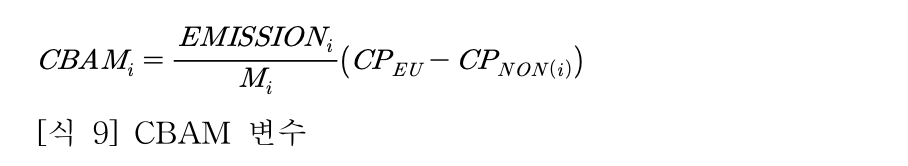

In [ ]:
emission = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/Annual greenhouse gas (GHG) emissions for Austria, in kt.csv')
m = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/gravity_m_2021.csv')
cp = pd.read_csv('/content/MyDrive/MyDrive/논문/데이터/(창고)/서연/탄소가격/carbon price data_08_2025.CSV')

#### Emission- 21년도 데이터만 활용

In [ ]:
# 논문 표 6 (Scope 1 + 2, tCO2/t) 데이터 추출 for 2021
emission_intensity_data = {
    'i': ['RUS', 'UKR', 'GBR', 'TUR', 'CAN', 'KOR', 'BRA', 'IND', 'CHN', 'ZAF', 'CHE', 'EGY', 'JPN', 'TWN', 'VNM'],
    'year': [2021] * 15,
    'Emission_i': [6.94, 4.12, 1.78, 1.77, 1.75, 2.53, 2.02, 6.13, 4.3, 16.14, 0.26, 0.47, 3.47, 3.08, 4.06]
}

emission_intensity_df = pd.DataFrame(emission_intensity_data)
emission_intensity_df.head()

,i,year,Emission_i
0,RUS,2021,6.94
1,UKR,2021,4.12
2,GBR,2021,1.78
3,TUR,2021,1.77
4,CAN,2021,1.75


In [ ]:
emission_intensity_df.shape

(15, 3)

#### M-21년도 데이터만 활용

In [ ]:
def preprocess_steel_production_m(raw_m_data):

    m_final = raw_m_data[['Country', 'Production_2021_Mt']].copy()
    m_final.rename(columns={'Production_2021_Mt': 'M_i'}, inplace=True)

    country_to_iso = {
        'China': 'CHN', 'India': 'IND', 'Japan': 'JPN', 'United States': 'USA',
        'Russia': 'RUS', 'South Korea': 'KOR', 'Germany': 'DEU',
        'Turkey': 'TUR', 'Brazil': 'BRA', 'Iran': 'IRN', 'Vietnam': 'VNM',
        'Taiwan': 'TWN', 'Indonesia': 'IDN', 'Mexico': 'MEX', 'France': 'FRA',
        'Italy': 'ITA', 'Canada': 'CAN', 'Spain': 'ESP', 'Ukraine': 'UKR',
        'Poland': 'POL', 'Egypt': 'EGY', 'Saudi Arabia': 'SAU',
        'United Kingdom': 'GBR', 'Belgium': 'BEL', 'South Africa': 'ZAF',

    }

    m_final['i'] = m_final['Country'].map(country_to_iso)
    m_final['year'] = 2021
    m_i_processed = m_final.dropna(subset=['i']).copy()
    m_i_processed = m_i_processed[['year', 'i', 'M_i']].drop_duplicates()
    return m_i_processed

m_i_processed = preprocess_steel_production_m(m)
m_i_processed.head()

,year,i,M_i
0,2021,CHN,1032.8
1,2021,IND,118.2
2,2021,JPN,96.3
3,2021,USA,85.8
4,2021,RUS,75.6


#### CP - **25**년도 데이터만 있음.. 논문에 수치 나와있어서 그냥 그거 쓰겠습니다

In [ ]:
cp.head(3)

,"Data last updated April 1, 2025",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,Unique ID,Name of the initiative,Instrument Type,Region,Income group,Metric,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000,2023.00000,2024.000000,2025.000000
1,Tax_CA_Alberta,Alberta carbon tax,Carbon tax,North America,High income,US$/tCO2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.026296,23.266636,22.493814,NaN,NaN,NaN,NaN,NaN,NaN
2,ETS_CA_Alberta,Alberta TIER,ETS,North America,High income,US$/tCO2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.010669,14.605648,11.864273,14.888337,15.577942,15.013512,14.753615,13.602975,11.893435,15.329194,22.539444,23.266636,22.493814,21.101498,31.834461,39.961637,48.03074,58.944887,66.211319


In [ ]:
import pandas as pd
import numpy as np

def preprocess_carbon_price_difference():

    cp_non_data = {
        'i': ['RUS', 'UKR', 'GBR', 'TUR', 'CAN', 'KOR', 'BRA', 'IND', 'CHN',
              'ZAF', 'CHE', 'EGY', 'JPN', 'TWN', 'VNM'],
        'year': [2021] * 15,
        'CP_NON': [0.00, 0.35, 24.79, 0.00, 31.83, 15.89, 0.00, 0.00, 6.31,
                   9.15, 46.10, 0.00, 2.60, 0.00, 0.00]
    }
    cp_df = pd.DataFrame(cp_non_data)

    # EU 탄소 가격 시나리오 (CP_EU) 정의
    cp_eu_scenarios = {
        '49': 49.77,
        '100': 100.00,
        '150': 150.00
    }

    # 3가지 시나리오에 대한 가격 차이 변수 계산
    for suffix, cp_eu in cp_eu_scenarios.items():
        # CP_Difference = CP_EU - CP_NON(i)
        cp_df[f'CP_DIFF_{suffix}'] = cp_eu - cp_df['CP_NON']

    # 최종적으로 필요한 컬럼만 선택 (year, i, 3가지 CP_DIFF)
    cp_diff_final = cp_df[['year', 'i', 'CP_DIFF_49', 'CP_DIFF_100', 'CP_DIFF_150']]

    return cp_diff_final


cp_diff_processed = preprocess_carbon_price_difference()
cp_diff_processed.head(3)

,year,i,CP_DIFF_49,CP_DIFF_100,CP_DIFF_150
0,2021,RUS,49.77,100.00,150.00
1,2021,UKR,49.42,99.65,149.65
2,2021,GBR,24.98,75.21,125.21


CBAM 계산

In [ ]:
cbam_base = pd.merge(
    emission_intensity_df,
    cp_diff_processed,
    on=['year', 'i'],
    how='inner'
)

cbam_base['CBAM_49'] = cbam_base['Emission_i'] * cbam_base['CP_DIFF_49']
cbam_base['CBAM_100'] = cbam_base['Emission_i'] * cbam_base['CP_DIFF_100']
cbam_base['CBAM_150'] = cbam_base['Emission_i'] * cbam_base['CP_DIFF_150']

cbam_final = cbam_base[['year', 'i', 'CBAM_49', 'CBAM_100', 'CBAM_150']]

gravity_data_1 = pd.merge(gravity_data_1, cbam_final, on=['year', 'i'], how='left')

gravity_data_1['CBAM_49'].fillna(0, inplace=True)
gravity_data_1['CBAM_100'].fillna(0, inplace=True)
gravity_data_1['CBAM_150'].fillna(0, inplace=True)


gravity_data_2 = pd.merge(gravity_data_2, cbam_final, on=['year', 'i'], how='left')

gravity_data_2['CBAM_49'].fillna(0, inplace=True)
gravity_data_2['CBAM_100'].fillna(0, inplace=True)
gravity_data_2['CBAM_150'].fillna(0, inplace=True)

/tmp/ipython-input-383940623.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gravity_data_1['CBAM_49'].fillna(0, inplace=True)
/tmp/ipython-input-383940623.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
## gravity_data_1 식에 대해
equation_8_1 = gravity_data_1.copy()

# 변수에 로그(ln) 변환 적용
# 더미 변수나, 이미 비율이나 지수로 표준화된 변수 중 일부에 로그를 씌우지 않음
# 연속형 규모 변수나 무역 비용 변수에 로그를 씌움
equation_8_1['ln_DIST_ij'] = np.log1p(equation_8_1['DIST_ij'])
equation_8_1['ln_GDP_i'] = np.log1p(equation_8_1['GDP_i'])
equation_8_1['ln_GDP_j'] = np.log1p(equation_8_1['GDP_j'])
equation_8_1['ln_POP_i'] = np.log1p(equation_8_1['POP_i'])
equation_8_1['ln_POP_j'] = np.log1p(equation_8_1['POP_j'])

equation_8_1['lnTARIFF_ij+CBAM_i_49'] = np.log1p(equation_8_1['TARIFF_ij']) + equation_8_1['CBAM_49']
equation_8_1['lnTARIFF_ij+CBAM_i_100'] = np.log1p(equation_8_1['TARIFF_ij']) + equation_8_1['CBAM_100']
equation_8_1['lnTARIFF_ij+CBAM_i_150'] = np.log1p(equation_8_1['TARIFF_ij'])+ equation_8_1['CBAM_150']

equation_8_1['ln_FIT_i'] = np.log1p(equation_8_1['FIT_i'])
equation_8_1['ln_PATENTS_i'] = np.log1p(equation_8_1['PATENTS_i'])
equation_8_1['ln_RENEWABLE_i'] = np.log1p(equation_8_1['RENEWABLE_i'])

equation_8_1.drop(columns=['TARIFF_ij', 'DIST_ij', 'GDP_i', 'GDP_j', 'POP_i', 'POP_j', 'FIT_i', 'PATENTS_i', 'RENEWABLE_i','CBAM_49','CBAM_100','CBAM_150'], inplace=True)

# 교호작용항 (Interaction Term) 생성
equation_8_1['(lnTARIFF_ij+CBAM_i_49)*ln_FIT_i'] = equation_8_1['lnTARIFF_ij+CBAM_i_49'] * equation_8_1['ln_FIT_i']
equation_8_1['(lnTARIFF_ij+CBAM_i_100)*ln_PATENTS_i'] = equation_8_1['lnTARIFF_ij+CBAM_i_100'] * equation_8_1['ln_PATENTS_i']
equation_8_1['(lnTARIFF_ij+CBAM_i_150)*ln_RENEWABLE_i'] = equation_8_1['lnTARIFF_ij+CBAM_i_150'] * equation_8_1['ln_RENEWABLE_i']

## gravity_data_2 식에 대해
equation_8_2 = gravity_data_2.copy()

# 변수에 로그(ln) 변환 적용
# 더미 변수나, 이미 비율이나 지수로 표준화된 변수 중 일부에 로그를 씌우지 않음
# 연속형 규모 변수나 무역 비용 변수에 로그를 씌움
equation_8_2['ln_DIST_ij'] = np.log1p(equation_8_2['DIST_ij'])
equation_8_2['ln_GDP_i'] = np.log1p(equation_8_2['GDP_i'])
equation_8_2['ln_GDP_j'] = np.log1p(equation_8_2['GDP_j'])
equation_8_2['ln_POP_i'] = np.log1p(equation_8_2['POP_i'])
equation_8_2['ln_POP_j'] = np.log1p(equation_8_2['POP_j'])

equation_8_2['lnTARIFF_ij+CBAM_i_49'] = np.log1p(equation_8_2['TARIFF_ij']) + equation_8_2['CBAM_49']
equation_8_2['lnTARIFF_ij+CBAM_i_100'] = np.log1p(equation_8_2['TARIFF_ij']) + equation_8_2['CBAM_100']
equation_8_2['lnTARIFF_ij+CBAM_i_150'] = np.log1p(equation_8_2['TARIFF_ij'])+ equation_8_2['CBAM_150']

equation_8_2['ln_FIT_i'] = np.log1p(equation_8_2['FIT_i'])
equation_8_2['ln_PATENTS_i'] = np.log1p(equation_8_2['PATENTS_i'])
equation_8_2['ln_RENEWABLE_i'] = np.log1p(equation_8_2['RENEWABLE_i'])

equation_8_2.drop(columns=['TARIFF_ij', 'DIST_ij', 'GDP_i', 'GDP_j', 'POP_i', 'POP_j', 'FIT_i', 'PATENTS_i', 'RENEWABLE_i','CBAM_49','CBAM_100','CBAM_150'], inplace=True)

# 교호작용항 (Interaction Term) 생성
equation_8_2['(lnTARIFF_ij+CBAM_i_49)*ln_FIT_i'] = equation_8_2['lnTARIFF_ij+CBAM_i_49'] * equation_8_2['ln_FIT_i']
equation_8_2['(lnTARIFF_ij+CBAM_i_100)*ln_PATENTS_i'] = equation_8_2['lnTARIFF_ij+CBAM_i_100'] * equation_8_2['ln_PATENTS_i']
equation_8_2['(lnTARIFF_ij+CBAM_i_150)*ln_RENEWABLE_i'] = equation_8_2['lnTARIFF_ij+CBAM_i_150'] * equation_8_2['ln_RENEWABLE_i']

In [ ]:
equation_8_1.head(2)

,year,i,j,RTA_ij,X_ij,STC_i,RCA_i,pi_i,x_j,ln_DIST_ij,ln_GDP_i,ln_GDP_j,ln_POP_i,ln_POP_j,lnTARIFF_ij+CBAM_i_49,lnTARIFF_ij+CBAM_i_100,lnTARIFF_ij+CBAM_i_150,ln_FIT_i,ln_PATENTS_i,ln_RENEWABLE_i,(lnTARIFF_ij+CBAM_i_49)*ln_FIT_i,(lnTARIFF_ij+CBAM_i_100)*ln_PATENTS_i,(lnTARIFF_ij+CBAM_i_150)*ln_RENEWABLE_i
0,2001,BRA,BEL,0,278060.241,34.69,1.64029,BRA_2001,BEL_2001,9.108418,20.131921,19.285246,12.083731,9.238692,2.745674,2.745674,2.745674,0.0,5.389072,4.446060,0.0,14.796634,12.207432
1,2002,BRA,BEL,0,2284131.632,35.45,1.64029,BRA_2002,BEL_2002,9.108418,20.038526,19.369981,12.097344,9.243174,2.685762,2.685762,2.685762,0.0,5.424950,4.462883,0.0,14.570127,11.986242


In [ ]:
equation_8_2.head(2)

,year,i,j,RTA_ij,X_ij,STC_i,RCA_i,pi_i,x_j,ln_DIST_ij,ln_GDP_i,ln_GDP_j,ln_POP_i,ln_POP_j,lnTARIFF_ij+CBAM_i_49,lnTARIFF_ij+CBAM_i_100,lnTARIFF_ij+CBAM_i_150,ln_FIT_i,ln_PATENTS_i,ln_RENEWABLE_i,(lnTARIFF_ij+CBAM_i_49)*ln_FIT_i,(lnTARIFF_ij+CBAM_i_100)*ln_PATENTS_i,(lnTARIFF_ij+CBAM_i_150)*ln_RENEWABLE_i
0,2005,BRA,BEL,0,647030.764,36.0,1.640290,BRA_2005,BEL_2005,9.107643,20.597913,19.773793,12.134273,9.257187,2.571242,2.571242,2.571242,0.0,5.726848,4.480368,0.0,14.725114,11.520111
1,2006,BRA,BEL,0,620769.468,36.9,1.469125,BRA_2006,BEL_2006,9.107643,20.808449,19.833320,12.144917,9.263782,2.567459,2.567459,2.567459,0.0,6.113682,4.476282,0.0,15.696627,11.492670


In [ ]:
equation_8_1.shape

(8505, 23)

In [ ]:
equation_8_2.shape

(6885, 23)



---



# 최종

In [ ]:
equation_7_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8505 entries, 0 to 8504
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   year                         8505 non-null   int64   
 1   i                            8505 non-null   object  
 2   j                            8505 non-null   object  
 3   RTA_ij                       8505 non-null   int64   
 4   X_ij                         7573 non-null   float64 
 5   STC_i                        8424 non-null   float64 
 6   RCA_i                        8370 non-null   float64 
 7   pi_i                         8505 non-null   category
 8   x_j                          8505 non-null   category
 9   ln_DIST_ij                   8060 non-null   float64 
 10  ln_GDP_i                     8316 non-null   float64 
 11  ln_GDP_j                     8145 non-null   float64 
 12  ln_POP_i                     8316 non-null   float64 
 13  ln_

In [ ]:
equation_7_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6885 entries, 0 to 6884
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         6885 non-null   int64  
 1   i                            6885 non-null   object 
 2   j                            6885 non-null   object 
 3   RTA_ij                       6885 non-null   int64  
 4   X_ij                         6270 non-null   float64
 5   STC_i                        6885 non-null   float64
 6   RCA_i                        6858 non-null   float64
 7   pi_i                         6885 non-null   object 
 8   x_j                          6885 non-null   object 
 9   ln_DIST_ij                   6604 non-null   float64
 10  ln_GDP_i                     6804 non-null   float64
 11  ln_GDP_j                     6585 non-null   float64
 12  ln_POP_i                     6804 non-null   float64
 13  ln_POP_j          

In [ ]:
equation_8_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8505 entries, 0 to 8504
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   year                                     8505 non-null   int64   
 1   i                                        8505 non-null   object  
 2   j                                        8505 non-null   object  
 3   RTA_ij                                   8505 non-null   int64   
 4   X_ij                                     7573 non-null   float64 
 5   STC_i                                    8424 non-null   float64 
 6   RCA_i                                    8370 non-null   float64 
 7   pi_i                                     8505 non-null   category
 8   x_j                                      8505 non-null   category
 9   ln_DIST_ij                               8060 non-null   float64 
 10  ln_GDP_i                            

In [ ]:
equation_8_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6885 entries, 0 to 6884
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     6885 non-null   int64  
 1   i                                        6885 non-null   object 
 2   j                                        6885 non-null   object 
 3   RTA_ij                                   6885 non-null   int64  
 4   X_ij                                     6270 non-null   float64
 5   STC_i                                    6885 non-null   float64
 6   RCA_i                                    6858 non-null   float64
 7   pi_i                                     6885 non-null   object 
 8   x_j                                      6885 non-null   object 
 9   ln_DIST_ij                               6604 non-null   float64
 10  ln_GDP_i                                 6804 no

In [ ]:
equation_7_1.to_csv('/content/MyDrive/MyDrive/논문/데이터/equation_7_1.csv', index=False)
equation_7_2.to_csv('/content/MyDrive/MyDrive/논문/데이터/equation_7_2.csv', index=False)
equation_8_1.to_csv('/content/MyDrive/MyDrive/논문/데이터/equation_8_1.csv', index=False)
equation_8_2.to_csv('/content/MyDrive/MyDrive/논문/데이터/equation_8_2.csv', index=False)